# Understanding the problem
Since the aim is to predict a binary output for each customer i.e the probability(likelihood) that a costumer will purchase a long-term package; It is crystal clear that this is a Binary Classification problem. 

<a class="anchor" id="0.1"></a>

## Table of Contents


The table of contents for this project are as follows: -


1.  [Import libraries](#1)
1.	[Import dataset](#2)
1.	[Exploratory data analysis](#3)
      - [Check shape of the dataset](#3.1)
	  - [Preview the dataset](#3.2)
	  - [Summary of dataset](#3.3)
      - [Dataset description](#3.4)
      - [Important points about dataset](#3.5)
      - [Statistical properties of dataset](#3.6)
      - [View column names](#3.7)
1.	[Univariate analysis](#4)
      - [Analysis of `ProdTaken` feature variable](#4.1)
      - [Findings of univariate analysis](#4.2)
1.	[Bivariate analysis](#5)
      - [Analysis of `ProductPitched` and `PreferredLoginDevice` variable](#5.1)
      - [Analysis of `ProductPitched` and `MaritalStatus` variable](#5.2)
      - [Findings of bivariate analysis](#5.3)
1.	[Multivariate analysis](#6)
      - [Heat Map](#6.1)
      - [Pair Plot](#6.2)
1.	[Data Preprocessing](#7)
      - [Handling duplicates](#7.1)
      - [Dealing with missing values](#7.2)
      - [Outlier detection](#7.3)
1.	[Feature Engineering](#8)
1.	[Model Building (Bagging)](#9)
        - [Decision Tree Classifier](#9.1)
        - [Random Forest Classifier](#9.2)
        - [Bagging Classifier](#9.3)
1.	[Model Building (Boosting)](#10)
        - [AdaBoost](#10.1)
        - [GradientBoosting](#10.2)
        - [Xgboost](#10.3)
        - [Stacking Classifier](#10.4)
1.	[Evaluation of Model Performance](#11)
1.	[Actionable Insights & Recommendations](#12)
    



## 1. Import libraries <a class="anchor" id="1"></a>

[Back to Table of Contents](#0.1)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
from sklearn.model_selection import StratifiedKFold,train_test_split
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import *
import xgboost
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

## 2. Import dataset <a class="anchor" id="2"></a>

[Back to Table of Contents](#0.1)


In [2]:
path= 'C:/Users/ALEX/Desktop/Tourism.xlsx'
data = pd.read_excel(path,sheet_name='Tourism')


## 3. Exploratory Data Analysis <a class="anchor" id="3"></a>

[Back to Table of Contents](#0.1)


#### Check shape of the dataset <a class="anchor" id="3.1"></a>


In [3]:
print('The Tourism Dataset has {} observations(rows) and {} variables(columns)'.format(data.shape[0],data.shape[1]))

The Tourism Dataset has 4888 observations(rows) and 20 variables(columns)


#### Preview the dataset <a class="anchor" id="3.2"></a>


In [4]:
data.head(3)

,CustomerID,ProdTaken,Age,PreferredLoginDevice,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Super Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Super Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Multi,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0


#### Summary of dataset <a class="anchor" id="3.3"></a>

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               4888 non-null   int64  
 1   ProdTaken                4888 non-null   int64  
 2   Age                      4662 non-null   float64
 3   PreferredLoginDevice     4863 non-null   object 
 4   CityTier                 4888 non-null   int64  
 5   DurationOfPitch          4637 non-null   float64
 6   Occupation               4888 non-null   object 
 7   Gender                   4888 non-null   object 
 8   NumberOfPersonVisited    4888 non-null   int64  
 9   NumberOfFollowups        4843 non-null   float64
 10  ProductPitched           4888 non-null   object 
 11  PreferredPropertyStar    4862 non-null   float64
 12  MaritalStatus            4888 non-null   object 
 13  NumberOfTrips            4748 non-null   float64
 14  Passport                

In [6]:
data['NumberOfPersonVisited'] = data['NumberOfPersonVisited'].astype('float32')
data['PitchSatisfactionScore'] = data['PitchSatisfactionScore'].astype('float32')

#### Dataset description <a class="anchor" id="3.4"></a>


#### Important points about dataset <a class="anchor" id="3.5"></a>


In [7]:
#is the dataset imbalanced?
data.ProdTaken.value_counts()/data.shape[0]

0    0.811784
1    0.188216
Name: ProdTaken, dtype: float64

In [8]:
#correct misspelt entry in Gender variable.
for i in range(data.shape[0]):
    if data.Gender[i] == 'Fe Male':
        data.Gender[i] ='Female'
data.Gender.value_counts()


Male      2916
Female    1972
Name: Gender, dtype: int64

In [9]:
#which features are categorical?
cat_col = data.select_dtypes(include=[np.object]).columns

#which features are numerical?
num_col = data.select_dtypes(include=[np.number]).columns
cat_col,num_col


(Index(['PreferredLoginDevice', 'Occupation', 'Gender', 'ProductPitched',
        'MaritalStatus', 'Designation'],
       dtype='object'),
 Index(['CustomerID', 'ProdTaken', 'Age', 'CityTier', 'DurationOfPitch',
        'NumberOfPersonVisited', 'NumberOfFollowups', 'PreferredPropertyStar',
        'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
        'NumberOfChildrenVisited', 'MonthlyIncome'],
       dtype='object'))

- Dataset is highly unbalanced
    - 81% of customers in the dataset have not puchased the long term travel package.(negative cases)
    - 19% of customers in the dataset have puchased the long term travel package.(positive cases)
- Gender variable comprises of Female, Male and a misspelt Fe Male entry which was corrected.

#### Statistical properties of dataset <a class="anchor" id="3.6"></a>

In [10]:
data.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisited,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724904,1.002509,0.798009,1.849019,0.454232,1.365793,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


#### View column names <a class="anchor" id="3.7"></a>

In [11]:
data.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'PreferredLoginDevice', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisited',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisited', 'Designation', 'MonthlyIncome'],
      dtype='object')

## 4. Univariate Analysis <a class="anchor" id="4"></a>


[Back to Table of Contents](#0.1)


####  Analysis of ProdTaken variable <a class="anchor" id="4.1"></a>



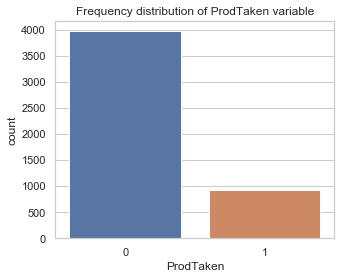

0    3968
1     920
Name: ProdTaken, dtype: int64

In [12]:
#Function for plotting univariate visualization for categorical variables.. 
def visualize(column,df=data):
    f, ax = plt.subplots(figsize=(5, 4))
    ax = sns.countplot(x=column, data=data)
    plt.title(f'Frequency distribution of {column} variable')
    plt.show()
    return data[column].value_counts()
visualize('ProdTaken',data)

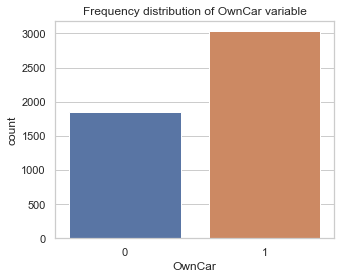

1    3032
0    1856
Name: OwnCar, dtype: int64

In [13]:
#visualize Frequency distribution of OwnCar variable
visualize('OwnCar',data)

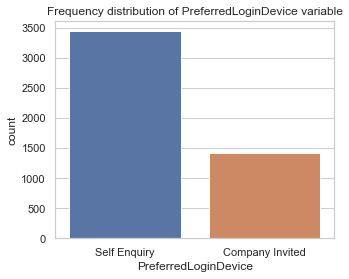

Self Enquiry       3444
Company Invited    1419
Name: PreferredLoginDevice, dtype: int64

In [14]:
#visualize Frequency distribution of PreferredLoginDevice variable
visualize('PreferredLoginDevice',data)

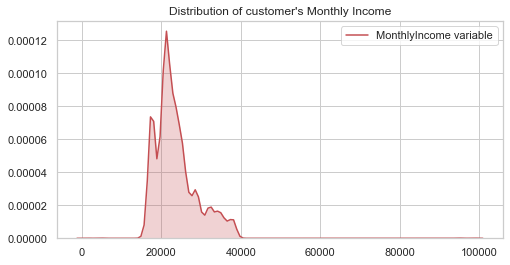

In [15]:
#plot  density distribution of Monthly Income variable
f, ax = plt.subplots(figsize=(8,4))
x = data['MonthlyIncome']
x = pd.Series(x, name="MonthlyIncome variable")
ax = sns.kdeplot(x, shade=True, color='r')
plt.title("Distribution of customer's Monthly Income")
plt.show()

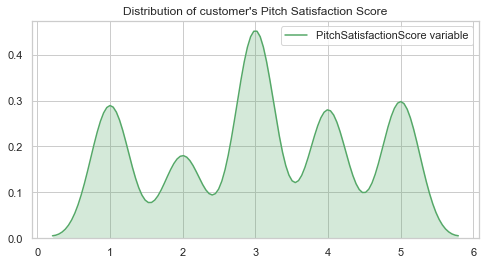

In [16]:
#plot  density distribution of PitchSatisfactionScore variable
f, ax = plt.subplots(figsize=(8,4))
x = data['PitchSatisfactionScore']
x = pd.Series(x, name="PitchSatisfactionScore variable")
ax = sns.kdeplot(x, shade=True, color='g')
plt.title("Distribution of customer's Pitch Satisfaction Score")
plt.show()


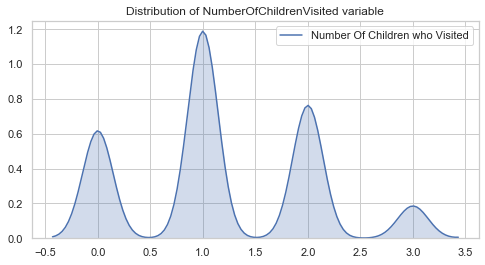

In [17]:
#plot  density distribution of NumberOfChildrenVisited variable
f, ax = plt.subplots(figsize=(8,4))
x = data['NumberOfChildrenVisited']
x = pd.Series(x, name="Number Of Children who Visited")
ax = sns.kdeplot(x, shade=True, color='b')
plt.title("Distribution of NumberOfChildrenVisited variable")
plt.show()



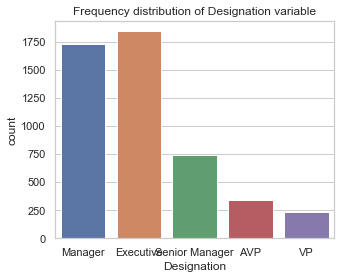

Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64

In [18]:
visualize('Designation',data)

#### Findings of univariate analysis <a class="anchor" id="4.1"></a>

- `ProdTaken` is the target variable and it represents the pruchase of a long term travel package.
    - 3968 customers are yet to purchase the package while 920 have purchased.
- During the course of the last month, majority of cutomers preferred `self-enquiry` as their login devices.
- The Monthly income of customers ranges from 1,000 to 98,678, with most earning less than 30,000 on a monthly basis
- More than a two-third of cuustomers prefer `Self Enquiry` as their Login Device
    - 3444 customers prefer `Self Enquiry` as their Login Device whereas 1419 prefer `Company Invited`
- There are 3032 customers who own car(s) while 1856 do not own cars
- Designation of customer in current organization:
    - 1842 customers are executives at their current organization
    - 1732 customers are holding Managerial positions in their current organization
    - 742 customers are senior managers
    - There are 342 and 230 customers who hold AVP and VP positions at their current organisations

## 5.  Bivariate Analysis <a class="anchor" id="5"></a>

[Back to Table of Contents](#0.1)



ProdTaken  Gender
0          Female    1630
           Male      2338
1          Female     342
           Male       578
Name: Gender, dtype: int64


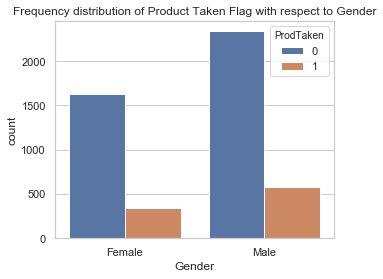

In [19]:
#group data by ProdTaken and Gender variables.
print(data.groupby(['ProdTaken','Gender'])['Gender'].count())
f, ax = plt.subplots(figsize=(5, 4))
ax = sns.countplot(x="Gender", hue="ProdTaken", data=data)
plt.title('Frequency distribution of Product Taken Flag with respect to Gender')
plt.show()

#### Analysis of ProductPitched and PreferredLoginDevice variable <a class="anchor" id="5.1"></a>

PreferredLoginDevice  ProductPitched
Company Invited       Deluxe              96
                      King                48
                      Multi              516
                      Standard           218
                      Super Deluxe       541
Self Enquiry          Deluxe             246
                      King               182
                      Multi             1316
                      Standard           524
                      Super Deluxe      1176
Name: ProductPitched, dtype: int64


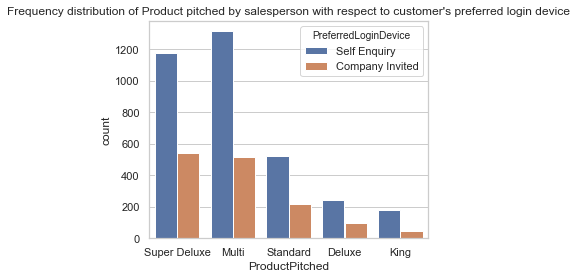

In [20]:
#group data by PreferredLoginDevice and ProductPitched variables.
print(data.groupby(['PreferredLoginDevice','ProductPitched'])['ProductPitched'].count())
f, ax = plt.subplots(figsize=(5, 4))
ax = sns.countplot(x="ProductPitched", hue="PreferredLoginDevice", data=data)
plt.title("Frequency distribution of Product pitched by salesperson with respect to customer's preferred login device")
plt.show()

#### Analysis of ProductPitched and MaritalStatus variable <a class="anchor" id="5.2"></a>


In [21]:
#group data by MaritalStatus and ProductPitched variables.
print(data.groupby(['ProductPitched','MaritalStatus',])['MaritalStatus'].count())

ProductPitched  MaritalStatus
Deluxe          Divorced          88
                Married          166
                Single            82
                Unmarried          6
King            Divorced          52
                Married          126
                Single            52
Multi           Divorced         332
                Married          816
                Single           511
                Unmarried        183
Standard        Divorced         142
                Married          380
                Single            50
                Unmarried        170
Super Deluxe    Divorced         336
                Married          852
                Single           221
                Unmarried        323
Name: MaritalStatus, dtype: int64


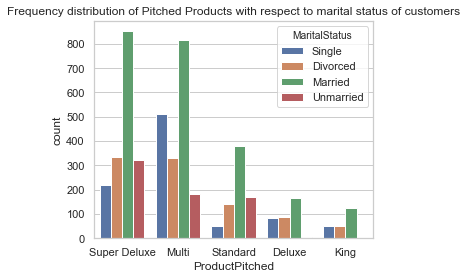

In [22]:
f, ax = plt.subplots(figsize=(5, 4))
ax = sns.countplot(x="ProductPitched", hue="MaritalStatus", data=data)
plt.title('Frequency distribution of Pitched Products with respect to marital status of customers')
plt.show()

Text(0.5, 1, 'Frequency distribution of Product Taken Flag with respect to Marital Status')

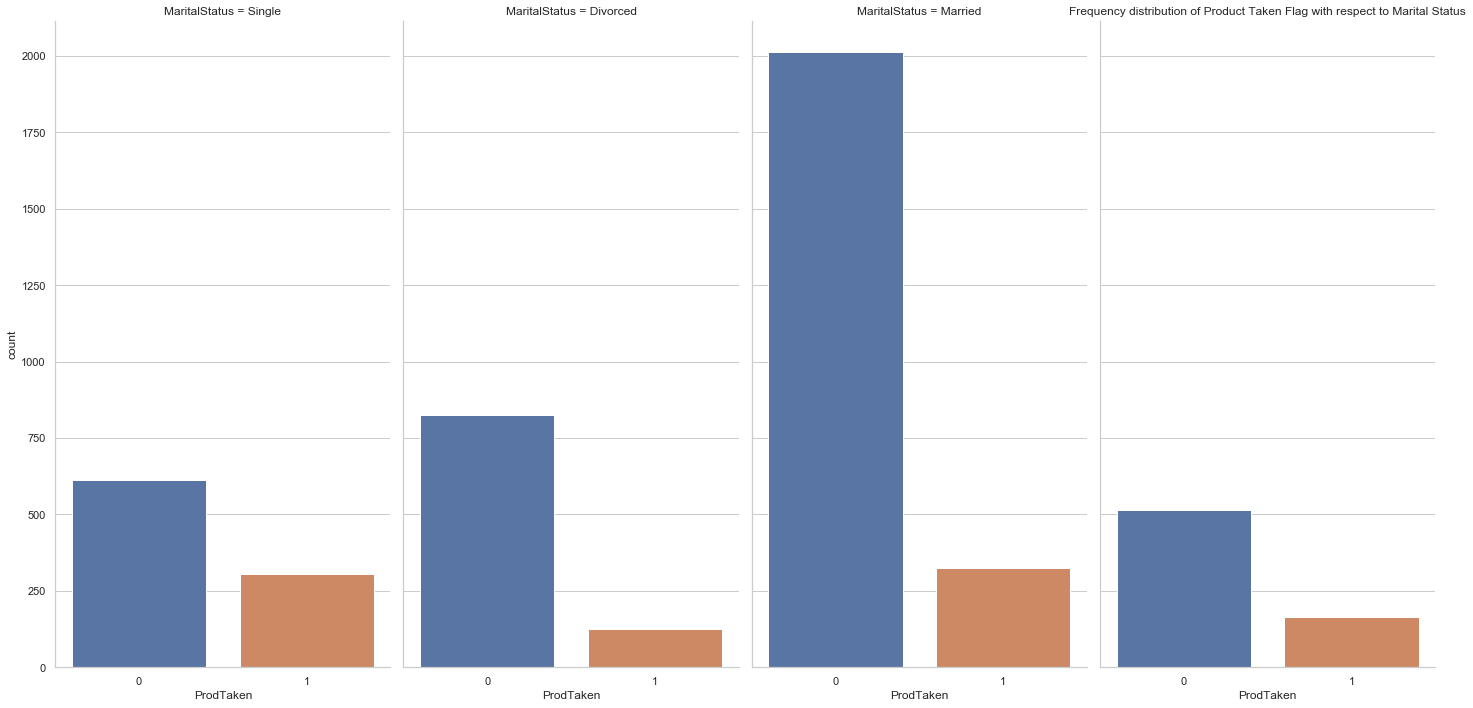

In [23]:
ax = sns.catplot(x="ProdTaken", col="MaritalStatus", data=data, kind="count", height=10, aspect=0.5)
plt.title('Frequency distribution of Product Taken Flag with respect to Marital Status')

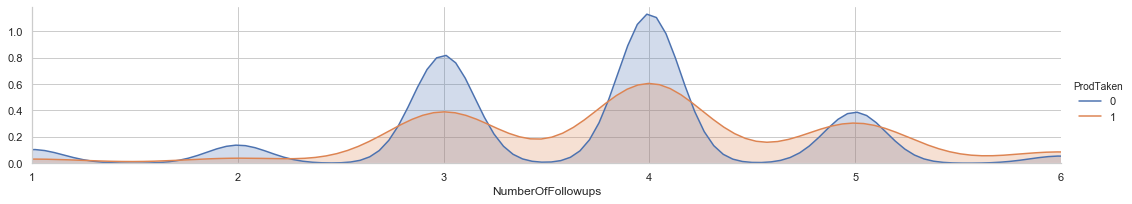

In [24]:
#density plot
def kdeplot(feature):
    facet =sns.FacetGrid(data, hue='ProdTaken', aspect=5)
    facet.map(sns.kdeplot, feature, shade=True)
    facet.set(xlim=(data[feature].min() ,data[feature].max()))
    facet.add_legend()
kdeplot('NumberOfFollowups')

In [25]:
data.groupby("ProdTaken")["ProductPitched"].apply(pd.value_counts)

ProdTaken              
0          Super Deluxe    1528
           Multi           1290
           Standard         618
           Deluxe           322
           King             210
1          Multi            552
           Super Deluxe     204
           Standard         124
           King              20
           Deluxe            20
Name: ProductPitched, dtype: int64

PreferredLoginDevice  Designation   
Company Invited       AVP                 96
                      Executive          516
                      Manager            541
                      Senior Manager     218
                      VP                  48
Self Enquiry          AVP                246
                      Executive         1316
                      Manager           1176
                      Senior Manager     524
                      VP                 182
Name: Designation, dtype: int64


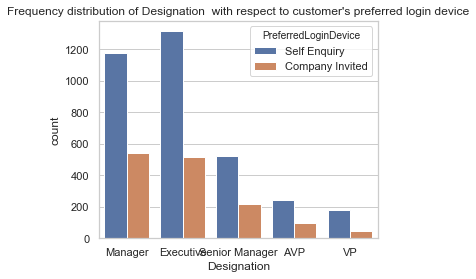

In [26]:
print(data.groupby(['PreferredLoginDevice','Designation'])['Designation'].count())
f, ax = plt.subplots(figsize=(5, 4))
ax = sns.countplot(x="Designation", hue="PreferredLoginDevice", data=data)
plt.title("Frequency distribution of Designation  with respect to customer's preferred login device")
plt.show()

In [27]:
data.groupby(["ProdTaken","ProductPitched"])["NumberOfFollowups"].mean()

ProdTaken  ProductPitched
0          Deluxe            3.605590
           King              3.757143
           Multi             3.583919
           Standard          3.762136
           Super Deluxe      3.666000
1          Deluxe            3.100000
           King              4.300000
           Multi             3.950730
           Standard          3.935484
           Super Deluxe      3.970000
Name: NumberOfFollowups, dtype: float64

#### Findings of bivariate analysis <a class="anchor" id="5.3"></a>

- Majority of `Company Invited` Customers were pitched `super deluxe` packages by sales personnel.
- Customers who preferred `self_enquiry` as their login device dominated the packages pitched by sales personnel.
- Salesmen pitched the `King` package to the least number of customers(230).
    - This could be due to price, a possible explanation could be that the king package was the least attractive.
- Salesmen pitched the `Super deluxe` package to the most number of customers(1717).
- No unmarried person purchased the `king` package.
- Married Couples dominated the purchase of all Tourist packages(Deluxe, King, Multi,etc)
- `company invited` customers are not frequent even among the customers who hold managerial and executive positions at their current organisations.
- for each of the packages pitched by the salesmen an average of 4 follow ups is done by the salesman.

## 6. Multivariate Analysis <a class="anchor" id="6"></a>

[Back to Table of Contents](#0.1)

In [28]:
print(data.groupby(['ProductPitched','CityTier',])['ProdTaken'].sum())

ProductPitched  CityTier
Deluxe          1             4
                2             0
                3            16
King            1            12
                2             0
                3             8
Multi           1           392
                2            38
                3           122
Standard        1            52
                2             8
                3            64
Super Deluxe    1            60
                2             0
                3           144
Name: ProdTaken, dtype: int64


- Customers from 2nd Tier cities only purchased the Standard and Multi packages.

#### Heat Maps <a class="anchor" id="6.1"></a>

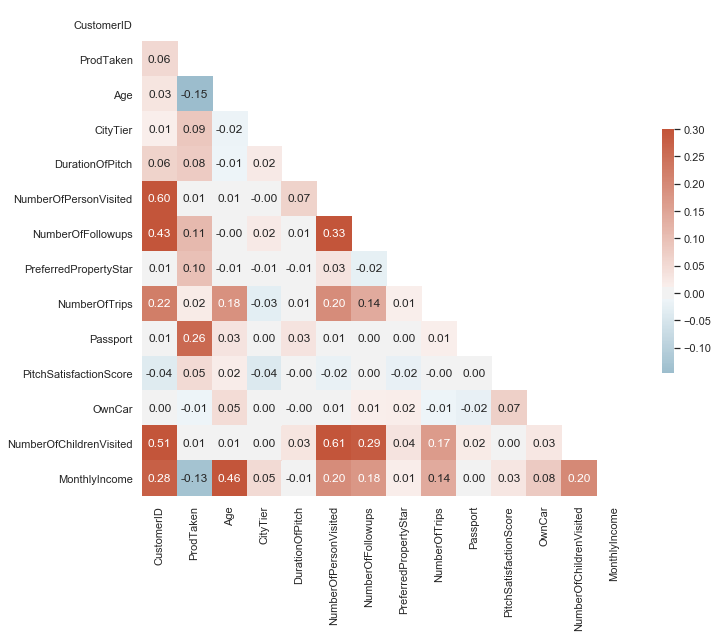

In [29]:
#correlation heatmap plot
corr = data[num_col].corr()
mask= np.triu(np.ones_like(corr,dtype=bool))
f,ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(230,20,as_cmap=True)
sns.heatmap(corr,mask=mask,cmap=cmap,center=0,square=True,annot=True, fmt='.2f',vmax=.3,cbar_kws={'shrink':.5})

- Most of the features have little or no correlation with one another.
    - The most correlated features are `NumberOfPersonVisited` and `NumberofChildrenVisited`.

#### Pair plot <a class="anchor" id="6.2"></a>

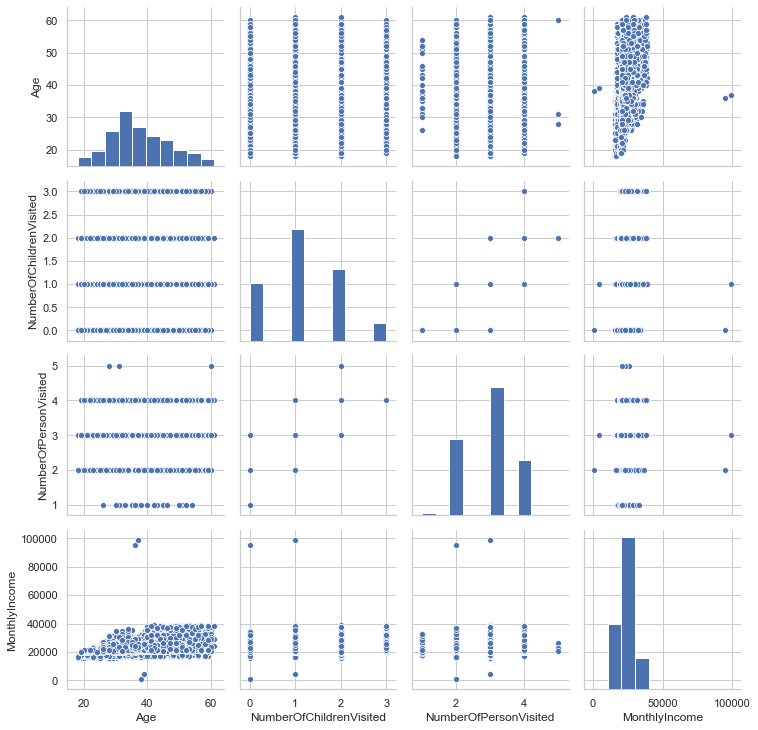

In [30]:
num_var = ['Age', 'NumberOfChildrenVisited', 'NumberOfPersonVisited', 'MonthlyIncome']
sns.pairplot(data[num_var], kind='scatter', diag_kind='hist')
plt.show()


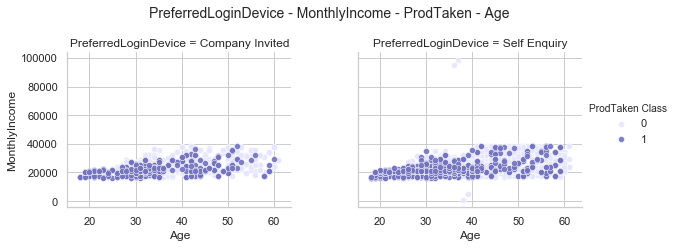

In [31]:
#plotting conditional relationship using Multi-plot grid.
g = sns.FacetGrid(data, col="PreferredLoginDevice", hue='ProdTaken',col_order=['Company Invited', 'Self Enquiry'], 
hue_order=[0,1],aspect=1.2, height=3.5, palette=sns.light_palette('navy', 3))
g.map(plt.scatter, "Age", "MonthlyIncome", alpha=0.9,edgecolor='white', linewidth=0.5)
fig = g.fig
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('PreferredLoginDevice - MonthlyIncome - ProdTaken - Age', fontsize=14)
#Add legend
l = g.add_legend(title='ProdTaken Class')

## 7. Data Preprocessing <a class="anchor" id="7"></a>

[Back to Table of Contents](#0.1)

#### Handling duplicates <a class="anchor" id="7.1"></a>

In [32]:
# Drop duplicates if any.
data.drop_duplicates(inplace=True)
#check if any duplicate still exists in dataset.
dpl = data.duplicated()
dpl.sum()

0

#### Dealing with missing values <a class="anchor" id="7.2"></a>

In [33]:
data.isnull().sum()

CustomerID                   0
ProdTaken                    0
Age                        226
PreferredLoginDevice        25
CityTier                     0
DurationOfPitch            251
Occupation                   0
Gender                       0
NumberOfPersonVisited        0
NumberOfFollowups           45
ProductPitched               0
PreferredPropertyStar       26
MaritalStatus                0
NumberOfTrips              140
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisited     66
Designation                  0
MonthlyIncome              233
dtype: int64

In [34]:
numerical_missing = ['MonthlyIncome','Age','NumberOfTrips','NumberOfFollowups',
"PreferredPropertyStar", 'DurationOfPitch','NumberOfChildrenVisited']
#replace missing data in numerical variables with the respective medians
for col in numerical_missing:
    median = np.nanmedian(data[col])
    data[col].replace({np.nan:median},inplace=True)

In [35]:
data.groupby("ProductPitched")["PreferredLoginDevice"].apply(pd.value_counts)

ProductPitched                 
Deluxe          Self Enquiry        246
                Company Invited      96
King            Self Enquiry        182
                Company Invited      48
Multi           Self Enquiry       1316
                Company Invited     516
Standard        Self Enquiry        524
                Company Invited     218
Super Deluxe    Self Enquiry       1176
                Company Invited     541
Name: PreferredLoginDevice, dtype: int64

In [36]:
data[["PreferredLoginDevice","ProductPitched"]][data["PreferredLoginDevice"].isnull() ==True]

,PreferredLoginDevice,ProductPitched
224,NaN,Super Deluxe
571,NaN,Multi
572,NaN,Super Deluxe
576,NaN,Super Deluxe
579,NaN,Multi
598,NaN,Multi
622,NaN,Super Deluxe
724,NaN,Super Deluxe
843,NaN,Multi
1021,NaN,Multi


In [37]:
#replace missing values with mode
mode = data['PreferredLoginDevice'].mode()
data['PreferredLoginDevice'].replace({np.nan:mode},inplace=True)

#### Outlier detection <a class="anchor" id="7.3"></a>

In [38]:
data.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisited,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,MonthlyIncome
count,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000
mean,202443.500000,0.188216,37.547259,1.654255,15.362930,2.905074,3.711129,3.577946,3.229746,0.290917,3.078151,0.620295,1.184738,23559.179419
std,1411.188388,0.390925,9.104795,0.916583,8.316166,0.724904,0.998271,0.797005,1.822769,0.454232,1.365793,0.485363,0.852323,5257.862921
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20485.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,43.000000,3.000000,19.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25424.750000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


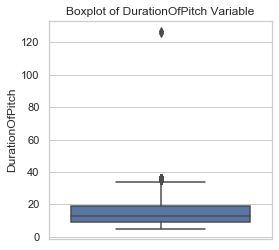

In [39]:
f, ax = plt.subplots(figsize=(4, 4))
sns.boxplot(y='DurationOfPitch', data=data)
plt.title('Boxplot of DurationOfPitch Variable')
plt.show()


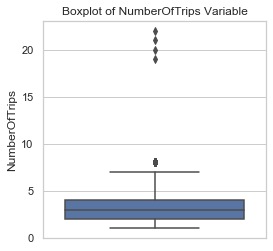

In [40]:
f, ax = plt.subplots(figsize=(4, 4))
sns.boxplot(y='NumberOfTrips', data=data)
plt.title('Boxplot of NumberOfTrips Variable')

plt.show()


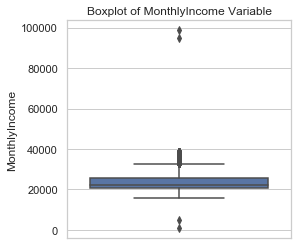

In [41]:
f, ax = plt.subplots(figsize=(4, 4))
sns.boxplot(y='MonthlyIncome', data=data)
plt.title('Boxplot of MonthlyIncome Variable')
plt.show()

In [42]:
#skewness of data
data.skew()

CustomerID                 0.000000
ProdTaken                  1.595763
Age                        0.415796
CityTier                   0.736531
DurationOfPitch            1.831803
NumberOfPersonVisited      0.029817
NumberOfFollowups         -0.381849
PreferredPropertyStar      0.903725
NumberOfTrips              1.485204
Passport                   0.920980
PitchSatisfactionScore    -0.127726
OwnCar                    -0.495892
NumberOfChildrenVisited    0.282551
MonthlyIncome              2.023306
dtype: float64

In [43]:
def remove_outlier(col,data):
    """
        Replace extreme values(all values in column which is greater than the 90th percentile)
        with median values.
        Parameters
        ----------
        col : String, columns whose outliers are to be treated.
        data : pandas DataFrame, shape [n_samples, n_columns]
            DataFrame containing columns with outliers.
            
        Returns
        -------
        pandas Series,
            Input column with treated outliers
        """
    #compute the median(50th percentile)
    median = data[col].quantile(0.50)
    #compute the outlier boundary(90th percentile)
    upper_90 = data[col].quantile(0.90)
    #replace outlier with median
    data[col] = np.where(data[col]>upper_90,median,data[col])
    return data[col]

data['DurationOfPitch'] = remove_outlier(col='DurationOfPitch',data=data)
data['MonthlyIncome'] = remove_outlier(col='MonthlyIncome',data=data)


In [44]:
#check the skewness of the features again for changes..
data.skew()

CustomerID                 0.000000
ProdTaken                  1.595763
Age                        0.415796
CityTier                   0.736531
DurationOfPitch            0.961071
NumberOfPersonVisited      0.029817
NumberOfFollowups         -0.381849
PreferredPropertyStar      0.903725
NumberOfTrips              1.485204
Passport                   0.920980
PitchSatisfactionScore    -0.127726
OwnCar                    -0.495892
NumberOfChildrenVisited    0.282551
MonthlyIncome              0.433810
dtype: float64

- Here we replaced the extreme values(outliers) with median values.
   - Any value within `DurationOfPitch` and `MonthlyIncome` variables which is greater than the 90th percentile were marked as extreme values and replaced with median

## 8. Feature Engineering <a class="anchor" id="8"></a>

[Back to Table of Contents](#0.1)
 


In [45]:
# variables associated with customer interaction data such as ProductPitched will be removed soon.
# ProductPitched is removed from cat_col as it will be dropped from feature set and not be encoded later on...
new_cat_col = cat_col.drop(np.array(['ProductPitched']))
new_num_col = num_col.drop(np.array(['NumberOfFollowups', 'PitchSatisfactionScore', 'DurationOfPitch']))

In [46]:
# Remove variables associated with customer interaction data.
customer_interaction_data = ['PitchSatisfactionScore','ProductPitched','NumberOfFollowups',
                           'DurationOfPitch' ]
data.drop(customer_interaction_data,axis=1,inplace=True)

In [47]:
#One Hot Encoding of Categorical features.
data = pd.get_dummies(data=data,columns=new_cat_col)

#Transformation of MonthlyIncome due to its skewness.
from scipy import stats 
data["MonthlyIncome"] =stats.yeojohnson(data["MonthlyIncome"])[0]

In [48]:
## prepare data for modelling
id = data['CustomerID']
target = data['ProdTaken']
feature_set = data.drop(['CustomerID','ProdTaken'],axis=1)

#split feature set into two groups: training and test sets.
#since the dataset is imbalanced we stratify the target column so that the distribution of classes remains the same in both train and test set.
x_train,x_test,y_train,y_test = train_test_split(feature_set,target,shuffle=True,stratify=target,random_state=23)
print('ProdTaken distribution in train set:',np.bincount(y_train))
print('ProdTaken distribution in test set:',np.bincount(y_test))

ProdTaken distribution in train set: [2976  690]
ProdTaken distribution in test set: [992 230]


## 9. Model Building(Bagging) <a class="anchor" id="9"></a>

[Back to Table of Contents](#0.1)


In [49]:
### Bagging
def train_model(estimator,scoring=average_precision_score,train=x_train,train_target=y_train,
                test=x_test,test_target=y_test):
    if scoring == roc_auc_score or scoring == average_precision_score:
        estimator = estimator.fit(train,train_target)
        pred_train = estimator.predict_proba(train)[:,1]
        prediction = estimator.predict_proba(test)[:,1]
        score_train = scoring(train_target,pred_train)
        score = scoring(test_target,prediction)
        print('Train score:',np.round(score_train,3))
        print('Test score:',np.round(score,3))
        
    else:
        estimator = estimator.fit(train,train_target)
        pred_train = estimator.predict(train)
        prediction = estimator.predict(test)
        score_train = scoring(train_target,pred_train)
        score = scoring(test_target,prediction)
        print('Train score:',np.round(score_train,3))
        print('Test score:',np.round(score,3))
        print('\n',classification_report(test_target,prediction))
    return estimator,prediction

    

#### Decision Tree Classifier <a class="anchor" id="9.1"></a>

In [50]:
### Decision Tree Model
DTC = DecisionTreeClassifier(max_depth=7,random_state=56)
DTC,pred_dtc = train_model(DTC)

Train score: 0.707
Test score: 0.544


#### Random Forest Classifier <a class="anchor" id="9.2"></a>

In [51]:
### Random Forest Model
RFC = RandomForestClassifier(n_jobs=-1,max_features=0.7,n_estimators=400,random_state=56)
RFC,pred_rfc = train_model(RFC)


Train score: 1.0
Test score: 0.84


#### Bagging Classifier <a class="anchor" id="9.3"></a>

In [52]:
### Bagging classifier Model
BGC = BaggingClassifier(n_estimators=150,n_jobs=-1,max_features=0.7,random_state=68)
BGC,pred_bgc = train_model(BGC)


Train score: 1.0
Test score: 0.856


**Which metric is right for model performance evaluation? and Why?**
        
 - Using the dataset as a reference point, 
      - From exploratory data analysis we understood that the data is unbalanced ;we have much more negative class cases. Accuracy will not be a reliable metric for our model performance because of the imbalance. For instance, we have a  81/19(N/P) split between the two classes in our dataset. Here the rare event is the positive class. We can build a model that is 81% accurate by saying everything belonged to the negative class.   Clearly this is as good as random guessing. Thus a high accuracy doesn't show prediction capacity for the minority (positive) class. For this we need a different metric to account for class imbalance... 
  - In this case we are not interested in how the model performs on the negative class, but we want to make sure that the model predicts the likelihood of buying a long-term package (i.e every positive prediction) correctly(precision), and that we get as many of the positives predicted as possible(recall). Hence an appropriate metric choice would be Precision-Recall AUC(average_precision_score). For example, the business objective is knowning customers who will purchase long term packages by obtaining the likelihood of buying, its not our interest in ensuring every negative prediction is correct, we want all the positive predictions to be correct and that we don't miss any. (in fact, in this case missing a customer who will purchase long-term packages would be worse than a false positive)

**Can model performance be improved?**
- From our analysis the best performing Bagging model is the Bagging Classifier. The performance of the Bagging Classifier Model and the others can still be improved to yield better results..The following methods could help improve model performance.
    - Tackling class imbalance with SMOTE
    - Better Feature Engineering
    - Feature selection from model's feature_importance method(e.g RandomForest,xgboost)
    - Better Outlier treatment techniques
    - Ensembling: Blending Model predictions with one another
    - Application of other encoding methods for encoding categorical variables e.g LabelEncoder,TargetEncoder,etc
    - Further Hyperparameter optimization and tuningradientBoosting Model and the others can still be improved to yield better results..The following methods could help improve model performance.
   

**A better means of capturing our model performance is cross-validation.**

In [54]:
from sklearn.model_selection import cross_val_score
#Instantiate stratifiedKfold as cross validation strategy
stf = StratifiedKFold(n_splits=5,shuffle=True,random_state=199)
cv_rfc = cross_val_score(RFC,x_train,y_train,scoring='average_precision',cv=stf,n_jobs=-1)
print('RandomForest CV performance:',cv_rfc.mean())
cv_bgc = cross_val_score(BGC,x_train,y_train,scoring='average_precision',cv=stf,n_jobs=-1)
print('Bagging Classifier CV performance:',cv_bgc.mean())

RandomForest CV performance: 0.7794327030203212
Bagging Classifier CV performance: 0.8008144292089348


## 10. Model Building(Boosting) <a class="anchor" id="10"></a>

[Back to Table of Contents](#0.1)


In [55]:
#Boosting
def train_xgboost(estimator,scoring=average_precision_score,train=x_train,train_target=y_train,
                test=x_test,test_target=y_test):
    if scoring == roc_auc_score or scoring == average_precision_score:
        estimator.fit(train,train_target,eval_set=[(test,test_target)],early_stopping_rounds=200,
                               verbose=50)
        pred_train = estimator.predict_proba(train)[:,1]
        prediction = estimator.predict_proba(test)[:,1]
        score_train = scoring(train_target,pred_train)
        score = scoring(test_target,prediction)
        print('Train score:',np.round(score_train,3))
        print('Test score:',np.round(score,3))
        
    else:
        estimator.fit(train,train_target,eval_set=[(test,test_target)],early_stopping_rounds=200,
                               verbose=50)
        pred_train = estimator.predict(train)
        prediction = estimator.predict(test)
        score_train = scoring(train_target,pred_train)
        score = scoring(test_target,prediction)
        print('Train score:',np.round(score_train,3))
        print('Test score:',np.round(score,3))
        print('\n',classification_report(test_target,prediction))
    return estimator,prediction

#### AdaBoost <a class="anchor" id="10.1"></a>

In [56]:
### Adaboost Model
ADC = AdaBoostClassifier(base_estimator=DTC,n_estimators=150,learning_rate=0.1,random_state=75)
ADC,pred_adc = train_model(ADC)

Train score: 1.0
Test score: 0.788


#### GradientBoosting <a class="anchor" id="10.2"></a>

In [57]:
### Gradientboosting Model
GBC = GradientBoostingClassifier(n_estimators=400,max_depth=9,max_features=0.9,learning_rate=0.2,random_state=75)
GBC,pred_gbc = train_model(GBC)

Train score: 1.0
Test score: 0.879


#### Xgboost <a class="anchor" id="10.3"></a>

In [58]:
### XGBOOST
from xgboost import XGBClassifier
xgbc = XGBClassifier(max_depth=7,colsample_bytree=0.7,n_estimators=500,random_state=67)
xgbc,pred_xgbc = train_xgboost(xgbc)

[0]	validation_0-error:0.15057
Will train until validation_0-error hasn't improved in 200 rounds.
[50]	validation_0-error:0.10311
[100]	validation_0-error:0.08920
[150]	validation_0-error:0.08429
[200]	validation_0-error:0.08183
[250]	validation_0-error:0.08183
[300]	validation_0-error:0.08265
[350]	validation_0-error:0.07938
Stopping. Best iteration:
[161]	validation_0-error:0.07692

Train score: 1.0
Test score: 0.836


#### Stacking Classifier <a class="anchor" id="10.4"></a>

In [59]:
### Stacking Classifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

#Estimators whose predictions are to be stacked
estimators = [('random_forests', RFC),('Decision tree',DTC),('logistic',LogisticRegression()),('xgboost', xgbc)]
clf = StackingClassifier(estimators=estimators, final_estimator=GBC,cv=stf,n_jobs=-1)
clf,pred_clf = train_model(clf)

Train score: 1.0
Test score: 0.811


## 11. Evaluation of Model Performance <a class="anchor" id="11"></a>

[Back to Table of Contents](#0.1)


**Which metric is right for model performance evaluation? and Why?**
        
 - Using the dataset as a reference point, 
      - From exploratory data analysis we understood that the data is unbalanced ;we have much more negative class cases. Accuracy will not be a reliable metric for our model performance because of the imbalance. For instance, we have a  81/19(N/P) split between the two classes in our dataset. Here the rare event is the positive class. We can build a model that is 81% accurate by saying everything belonged to the negative class.   Clearly this is as good as random guessing. Thus a high accuracy doesn't show prediction capacity for the minority (positive) class. For this we need a different metric to account for class imbalance... 
  - In this case we are not interested in how the model performs on the negative class, but we want to make sure that the model predicts the likelihood of buying a long-term package (i.e every positive prediction) correctly(precision), and that we get as many of the positives predicted as possible(recall). Hence an appropriate metric choice would be Precision-Recall AUC(average_precision_score). For example, the business objective is knowning customers who will purchase long term packages by obtaining the likelihood of buying, its not our interest in ensuring every negative prediction is correct, we want all the positive predictions to be correct and that we don't miss any. (in fact, in this case missing a customer who will purchase long-term packages would be worse than a false positive)

**Can model performance be improved?**
- From our analysis the best performing model is the GradientBoosting Classifier. The performance of the GradientBoosting Model and the others can still be improved to yield better results..The following methods could help improve model performance.
    - Tackling class imbalance with SMOTE
    - Better Feature Engineering
    - Feature selection from model's feature_importance method(e.g RandomForest,xgboost)
    - Better Outlier treatment techniques
    - Ensembling: Blending Model predictions with one another
    - Application of other encoding methods for encoding categorical variables e.g LabelEncoder,TargetEncoder,etc
    - Further Hyperparameter optimization and tuning

**A better means of capturing our model performance is cross-validation.**

In [60]:
cv_gbm = cross_val_score(GBC,x_train,y_train,scoring='average_precision',cv=stf,n_jobs=-1)
print('Gradient Boosting CV performance:',cv_gbm.mean())
print('=='*10)
cv_xgb = cross_val_score(xgbc,x_train,y_train,scoring='average_precision',fit_params={'eval_set':[(x_train,y_train)],
                    'early_stopping_rounds':200,'verbose':50},cv=stf,n_jobs=-1)
print('xgboost CV performance:',cv_xgb.mean())


Gradient Boosting CV performance: 0.8265779903233407
xgboost CV performance: 0.7570869688989427


## 12. Actionable Insights & Recommendations <a class="anchor" id="12"></a>

[Back to Table of Contents](#0.1)


**Compare Models**

Text(0.5, 1, 'Adaboost')

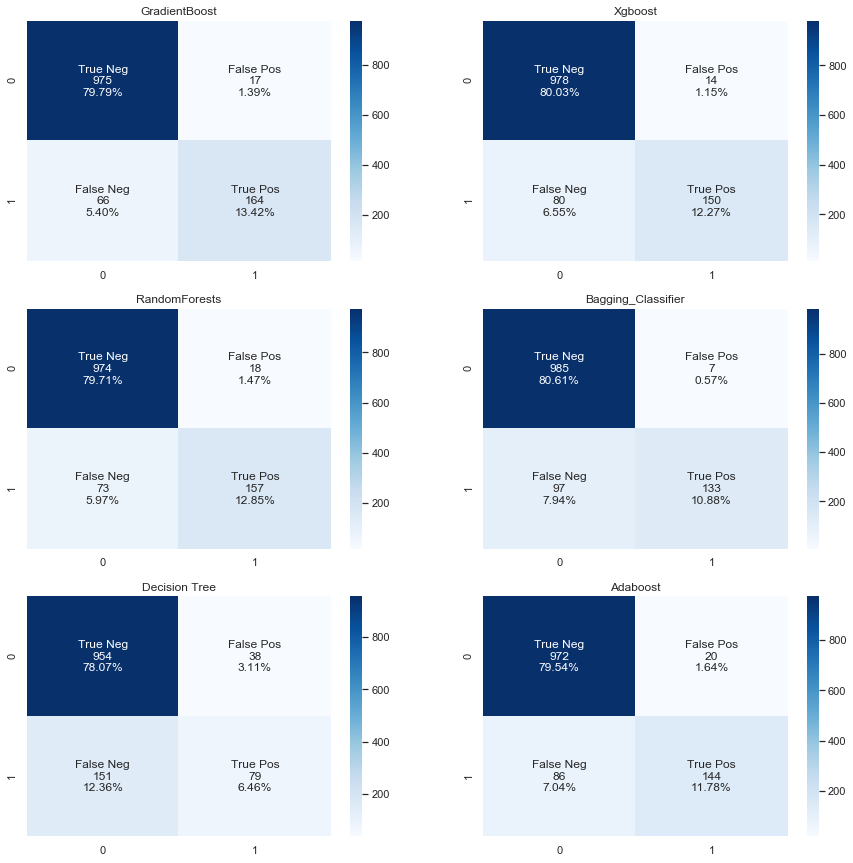

In [61]:
#compute confusion matrix 
def conf_matrix(y_true,y_pred):
    """
        computes confusion matrix and labels using the predictions from a pretrained estimator.
        Parameters
        ----------
        y_true : 1d array-like, or label indicator array / sparse matrix
        Ground truth (correct) labels.
    
        y_pred : 1d array-like, or label indicator array / sparse matrix
        Predicted labels, as returned by a classifier.
        Returns
        -------
        cf_matrix : 2d array-like, or label indicator array / sparse matrix
        confusion matrix.
        labels : 2d array-like, or label indicator array / sparse matrix
        confusion matrix labels.
        
        """
    cf_matrix = confusion_matrix(y_true, y_pred)
    group_names= ['True Neg','False Pos','False Neg','True Pos']
    #compute counts of TN,FP,FN,TF
    group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
    #compute percentages of TN,FP,FN,TF as predicted by a pretrained classifier
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/ np.sum(cf_matrix)]
    labels =[f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    # Here we express the labels as 2x2 matrix (the same shape as confusion matrices)
    labels = np.asarray(labels).reshape(2,2)
    #return confusion_matrix and label array
    return cf_matrix ,labels


cf_matrix_gbc,label_gbc = conf_matrix(y_test, np.round(pred_gbc))
cf_matrix_xgbc,label_xgbc = conf_matrix(y_test, np.round(pred_xgbc))
cf_matrix_rfc,label_rfc = conf_matrix(y_test, np.round(pred_rfc))
cf_matrix_bgc,label_bgc = conf_matrix(y_test, np.round(pred_bgc))
cf_matrix_dtc,label_dtc = conf_matrix(y_test, np.round(pred_dtc))
cf_matrix_adc,label_adc = conf_matrix(y_test, np.round(pred_adc))

#Plot confusion matrices for all classifier to compare predictions..
f, ax = plt.subplots(3,2,figsize=(15, 15))
sns.heatmap(cf_matrix_gbc,annot=label_gbc,fmt='',cmap='Blues',ax=ax[0,0])
ax[0,0].set_title('GradientBoost')
sns.heatmap(cf_matrix_xgbc,annot=label_xgbc,fmt='',cmap='Blues',ax=ax[0,1])
ax[0,1].set_title('Xgboost')
sns.heatmap(cf_matrix_rfc,annot=label_rfc,fmt='',cmap='Blues',ax=ax[1,0])
ax[1,0].set_title('RandomForests')
sns.heatmap(cf_matrix_bgc,annot=label_bgc,fmt='',cmap='Blues',ax=ax[1,1])
ax[1,1].set_title('Bagging_Classifier')
sns.heatmap(cf_matrix_dtc,annot=label_dtc,fmt='',cmap='Blues',ax=ax[2,0])
ax[2,0].set_title('Decision Tree')
sns.heatmap(cf_matrix_adc,annot=label_adc,fmt='',cmap='Blues',ax=ax[2,1])
ax[2,1].set_title('Adaboost')

- All classifiers are good at classifying negative sample cases.
    - Bagging Classifier is the best at predicting the negative class(very few False Positives) closely followed by xgboost.
    - The Decision Tree Classifier does the least at predicting the negative class.
- All classifiers are poor at classifying positive sample cases. This is as a result of the class imbalance.
    - The GradientBoosting Classifier classified the most number of positive class samples.
    - The Decision Tree Classifier misclassified the most number of positive class samples.
- Generally the classifiers are good at predicting the likelihood of Customers who will not purchase long-term as opposed to the business objective.

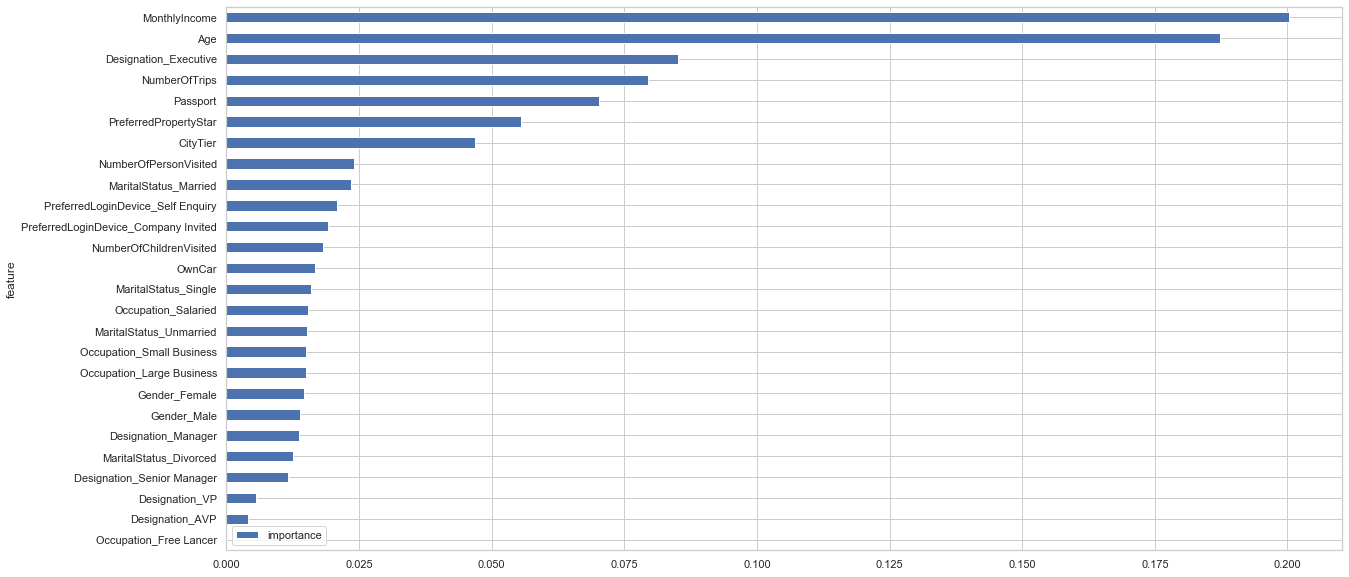

In [62]:
#Obtain feature importance from best performing model(GradientBoost) and plot importance graph.
importance_df = pd.DataFrame({'importance':GBC.feature_importances_, 'feature': feature_set.columns})
#
importance_df = importance_df.sort_values(['importance', 'feature'], ascending=[True, False]).iloc[-30:]
_ = importance_df.plot(kind='barh', x='feature', y='importance', figsize=(20, 10))
plt.savefig('gbm_feature_importance.png')


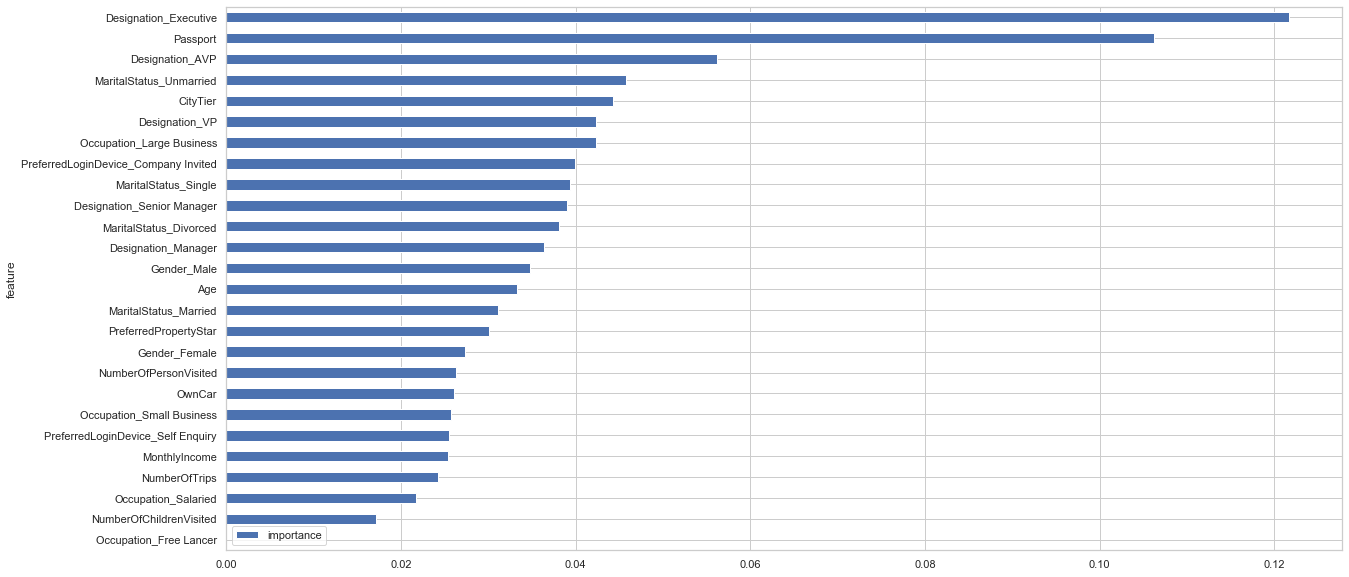

In [63]:
#Obtain feature importance of xgboost model and plot importance graph.
importance_df = pd.DataFrame({'importance':xgbc.feature_importances_, 'feature': feature_set.columns})
importance_df = importance_df.sort_values(['importance', 'feature'], ascending=[True, False]).iloc[-30:]
_ = importance_df.plot(kind='barh', x='feature', y='importance', figsize=(20, 10))
plt.savefig('xgb_feature_importance.png')


**Business Recommendations and insights**

**Recommendations**
- Adoption and promotion of techniques used by Salesmen who pitched Multi as Multi package was purchased more than any other packages(including Super Deluxe).
    - This may be because More singles were pitched the multi packages than in any other packages combined(511).
- Sales personnel should intensify efforts in following up and pitching Multi packages as they are the most purchased by members from cities of any tier.

**Insights**
- More time was spent by salesmen in successfully pitching all package except King.
- Best performing Model(GradientBoost) suggests that Monthly income, Number of trips and age are important in predicting the likeliood of package purchase.
- for each of the packages pitched by the salesmen an average of 4 follow ups is done by the salesman.
- Best performing Model(GradientBoost) suggests that customers who are free lancer are least important in predicting the likeliood of package purchase.
- More singles were pitched multi packages than in any other packages combined(511).
- No Unmarried individual was pitched the king package.
- Married Couples dominated the purchase of all Tourist packages(Deluxe, King, Multi,etc)
- company invited customers are not frequent even among the customers who hold managerial and executive positions at their current organisations.
- Customers from 2nd Tier cities only purchased the Standard and Multi packages.